### **데이터 시각화**

공통 (환경설정 & 데이터 로드)

In [1]:
# 공통 (환경설정 & 데이터 로드) 및 문장 길이 분포 분석/시각화 통합

# ===================== 공통: 환경 세팅 및 데이터 로드 =====================
import os, re, math, random, numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm
from transformers import AutoTokenizer # 토크나이저 임포트
import seaborn as sns # seaborn 임포트
import matplotlib.font_manager as fm # 폰트 매니저 임포트
from IPython.display import Image, display # 이미지 표시 임포트

# 경로 설정
DATA_DIR = r"/content/" # DATA_DIR을 /content/로 수정
train_path = os.path.join(DATA_DIR, "train.csv")
test_path = os.path.join(DATA_DIR, "test.csv")
lex_path   = os.path.join(DATA_DIR, "general_data.txt")

# 결과 폴더
OUT_DIR = os.path.join(DATA_DIR, "outputs")
FIG_DIR = os.path.join(OUT_DIR, "figures")
TAB_DIR = os.path.join(OUT_DIR, "tables")
os.makedirs(FIG_DIR, exist_ok=True)
os.makedirs(TAB_DIR, exist_ok=True)

# 시각화 공통 함수
def savefig_tight(path):
    plt.tight_layout()
    plt.savefig(path, dpi=150)
    print(f"📁 저장됨: {path}")
    plt.close()

# 폰트 설정 (이전 오류 해결 내용 반영)
# Nanum 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
if os.path.exists(fontpath):
    fm.fontManager.addfont(fontpath) # 폰트를 강제로 추가합니다.
    plt.rc('font', family='NanumBarunGothic') # 재확인 차원에서 다시 설정
    plt.rcParams['axes.unicode_minus'] = False
    print("✅ Matplotlib 폰트 설정 완료: NanumBarunGothic")
else:
    print(f"❌ 폰트 파일이 다음 경로에 존재하지 않습니다: {fontpath}\n한글 폰트가 깨져 보일 수 있습니다.")

# 데이터 로드
df_train = pd.read_csv(train_path)
df_train = df_train.dropna(subset=["conversation"])
df_train = df_train.drop_duplicates(subset=["class","conversation"]).reset_index(drop=True)

# general_data.txt 로드 및 통합
df_general = pd.read_csv(lex_path)
df_general = df_general.dropna(subset=["conversation"])
df_general = df_general.drop_duplicates(subset=["class","conversation"]).reset_index(drop=True)

df = pd.concat([df_train, df_general], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True) # 데이터 섞기

print("\n--- 통합 데이터프레임 미리보기 ---")
print(df.head())
print("\n--- 클래스 분포 ---", df["class"].value_counts())

# general_data.txt 파일 내용 미리보기
print(f"\n--- 'general_data.txt' 파일 내용 미리보기 ({lex_path}) ---")
if os.path.exists(lex_path):
    with open(lex_path, 'r', encoding='utf-8') as f:
        content = f.read()
    print(content[:500]) # 파일의 처음 500자만 출력하여 내용을 확인합니다.
    print("\n(파일 내용이 길어 일부만 출력했습니다.)")
else:
    print(f"❌ 'general_data.txt' 파일이 다음 경로에 존재하지 않습니다: {lex_path}")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,323 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 125082 files and dire

In [3]:
import os, re, math, random, numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm
from transformers import AutoTokenizer # 토크나이저 임포트
import seaborn as sns # seaborn 임포트
import matplotlib.font_manager as fm # 폰트 매니저 임포트
from IPython.display import Image, display # 이미지 표시 임포트

# 경로 설정
DATA_DIR = r"/content/" # DATA_DIR을 /content/로 수정
train_path = os.path.join(DATA_DIR, "train.csv")
test_path = os.path.join(DATA_DIR, "test.csv")
lex_path   = os.path.join(DATA_DIR, "general_data.txt")

# 결과 폴더
OUT_DIR = os.path.join(DATA_DIR, "outputs")
FIG_DIR = os.path.join(OUT_DIR, "figures")
TAB_DIR = os.path.join(OUT_DIR, "tables")
os.makedirs(FIG_DIR, exist_ok=True)
os.makedirs(TAB_DIR, exist_ok=True)

# 시각화 공통 함수
def savefig_tight(path):
    plt.tight_layout()
    plt.savefig(path, dpi=150)
    print(f"📁 저장됨: {path}")
    plt.close()

# 폰트 설정 (이전 오류 해결 내용 반영)
# Nanum 폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv

# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# if os.path.exists(fontpath):
#     fm.fontManager.addfont(fontpath) # 폰트를 강제로 추가합니다.
#     plt.rc('font', family='NanumBarunGothic') # 재확인 차원에서 다시 설정
#     plt.rcParams['axes.unicode_minus'] = False
#     print("✅ Matplotlib 폰트 설정 완료: NanumBarunGothic")
# else:
#     print(f"❌ 폰트 파일이 다음 경로에 존재하지 않습니다: {fontpath}\n한글 폰트가 깨져 보일 수 있습니다.")

# ===================== 3. TF-IDF & WordCloud =====================
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

# TF-IDF
vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b[\w가-힣]{2,}\b", ngram_range=(1,2), min_df=2)
X = vectorizer.fit_transform(df["conversation"])
vocab = np.array(vectorizer.get_feature_names_out())

def top_terms(label, topn=30):
    idx = df["class"]==label
    scores = np.asarray(X[idx.to_numpy()].mean(axis=0)).ravel() # Fix: Convert boolean Series to numpy array
    top_idx = scores.argsort()[::-1][:topn]
    return pd.DataFrame({"term":vocab[top_idx],"score":scores[top_idx]})

tfidf_all = []
for cls in df["class"].unique():
    tmp = top_terms(cls)
    tmp["class"] = cls
    tfidf_all.append(tmp)
tfidf_all = pd.concat(tfidf_all)
tfidf_all.to_csv(os.path.join(TAB_DIR,"tfidf_top_terms.csv"),index=False)

# WordCloud
FONT_PATH = os.path.join(DATA_DIR,"NanumGothic.ttf")
if not os.path.exists(FONT_PATH):
    !wget -q -O "{FONT_PATH}" "https://github.com/google/fonts/raw/main/ofl/nanumgothic/NanumGothic-Regular.ttf"

for cls in df["class"].unique():
    text = " ".join(df.loc[df["class"]==cls,"conversation"])
    wc = WordCloud(font_path=FONT_PATH, background_color="white", width=1000, height=700).generate(text)
    plt.imshow(wc); plt.axis("off"); plt.title(f"WordCloud - {cls}")
    savefig_tight(os.path.join(FIG_DIR, f"wordcloud_{cls}.png"))

📁 저장됨: /content/outputs/figures/wordcloud_갈취 대화.png
📁 저장됨: /content/outputs/figures/wordcloud_기타 괴롭힘 대화.png
📁 저장됨: /content/outputs/figures/wordcloud_직장 내 괴롭힘 대화.png
📁 저장됨: /content/outputs/figures/wordcloud_협박 대화.png
📁 저장됨: /content/outputs/figures/wordcloud_일반.png


### **워드클라우드 분석 및 시각화**

--- 각 클래스별 워드클라우드 시각화 및 주요 키워드 분석 ---

--- 클래스: 갈취 대화 ---


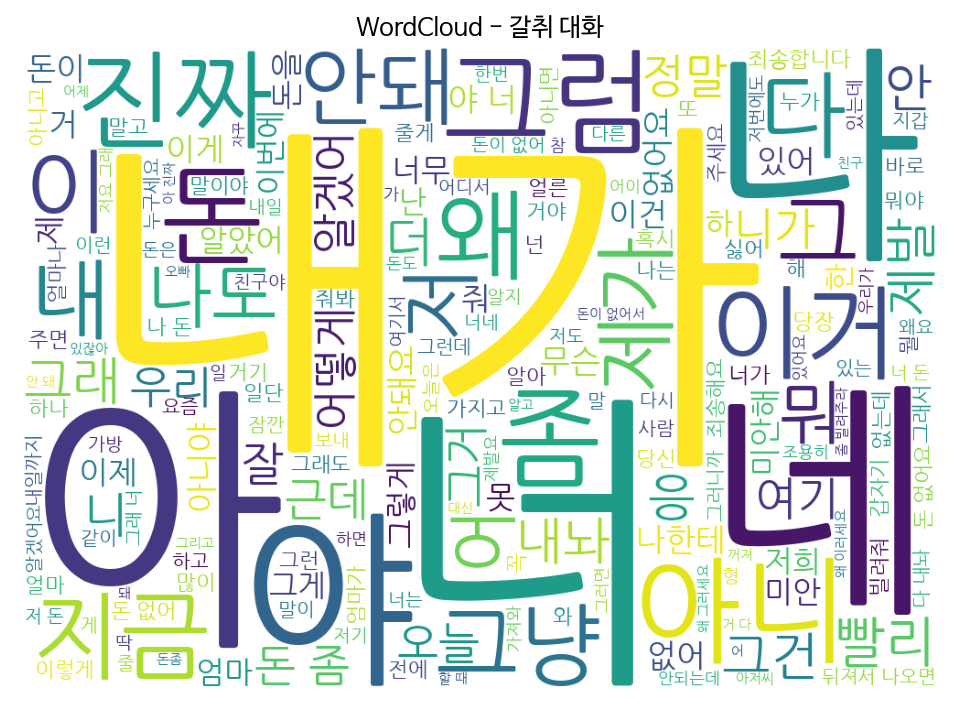

주요 키워드 (TF-IDF 기준 상위 10개):
  - 내가 (스코어: 0.0302)
  - 이거 (스코어: 0.0242)
  - 내놔 (스코어: 0.0232)
  - 돈이 (스코어: 0.0221)
  - 진짜 (스코어: 0.0220)
  - 그럼 (스코어: 0.0213)
  - 없어요 (스코어: 0.0205)
  - 안돼 (스코어: 0.0204)
  - 아니 (스코어: 0.0195)
  - 없어 (스코어: 0.0188)
--------------------------------------------------

--- 클래스: 기타 괴롭힘 대화 ---


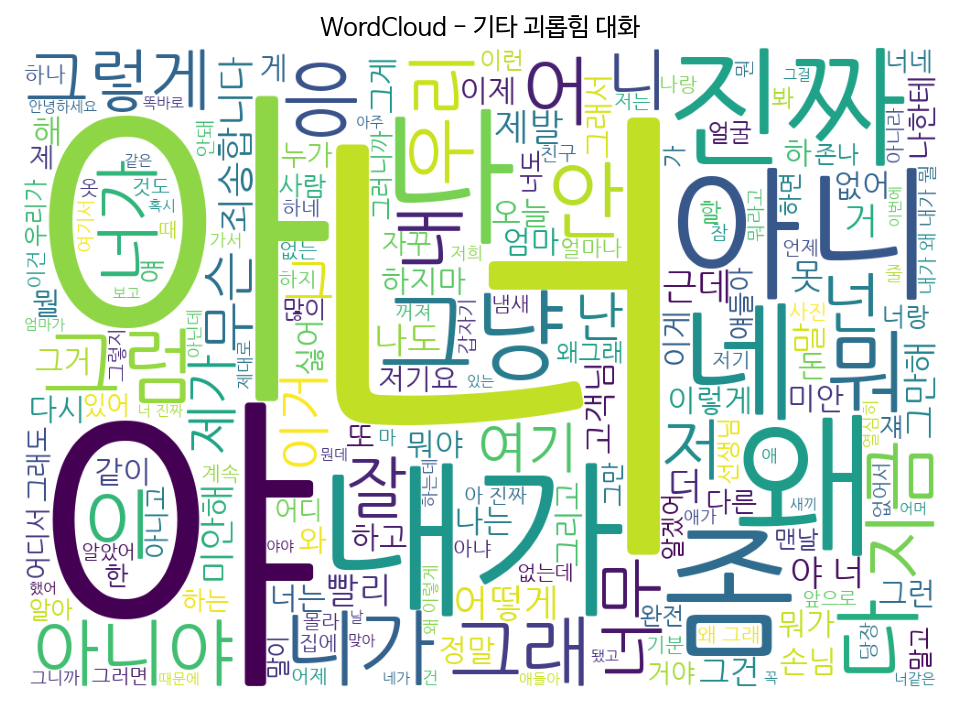

주요 키워드 (TF-IDF 기준 상위 10개):
  - 내가 (스코어: 0.0269)
  - 진짜 (스코어: 0.0229)
  - 아니 (스코어: 0.0216)
  - 그냥 (스코어: 0.0180)
  - 아니야 (스코어: 0.0165)
  - 니가 (스코어: 0.0148)
  - 그만해 (스코어: 0.0148)
  - 그래 (스코어: 0.0147)
  - 그렇게 (스코어: 0.0145)
  - 고객님 (스코어: 0.0142)
--------------------------------------------------

--- 클래스: 직장 내 괴롭힘 대화 ---


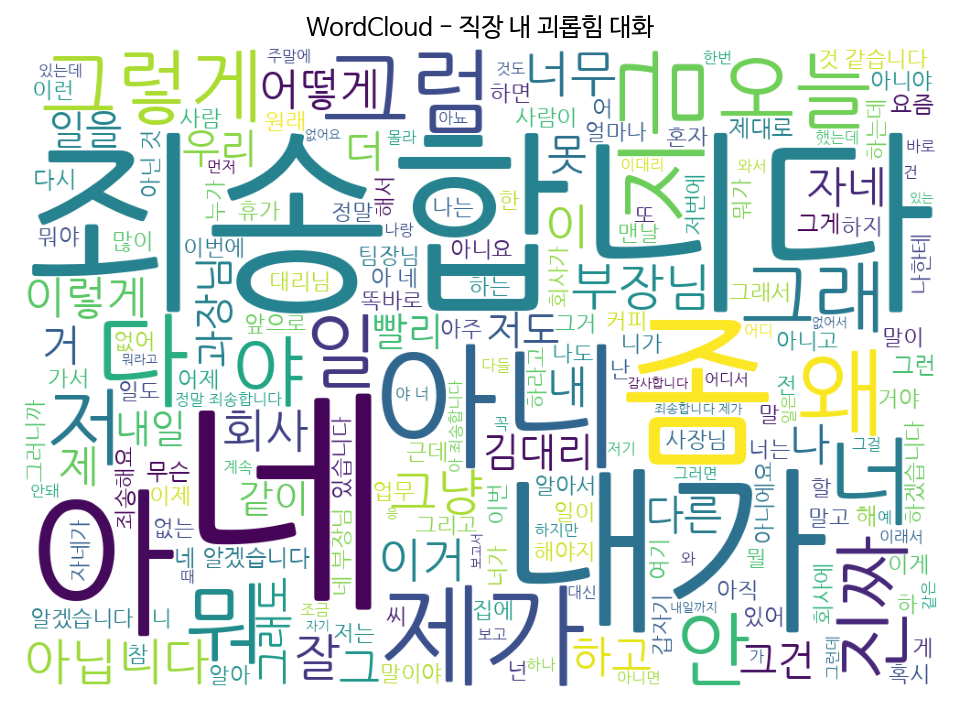

주요 키워드 (TF-IDF 기준 상위 10개):
  - 죄송합니다 (스코어: 0.0566)
  - 제가 (스코어: 0.0246)
  - 내가 (스코어: 0.0230)
  - 부장님 (스코어: 0.0229)
  - 아니 (스코어: 0.0218)
  - 아닙니다 (스코어: 0.0199)
  - 지금 (스코어: 0.0184)
  - 오늘 (스코어: 0.0166)
  - 알겠습니다 (스코어: 0.0161)
  - 그럼 (스코어: 0.0157)
--------------------------------------------------

--- 클래스: 협박 대화 ---


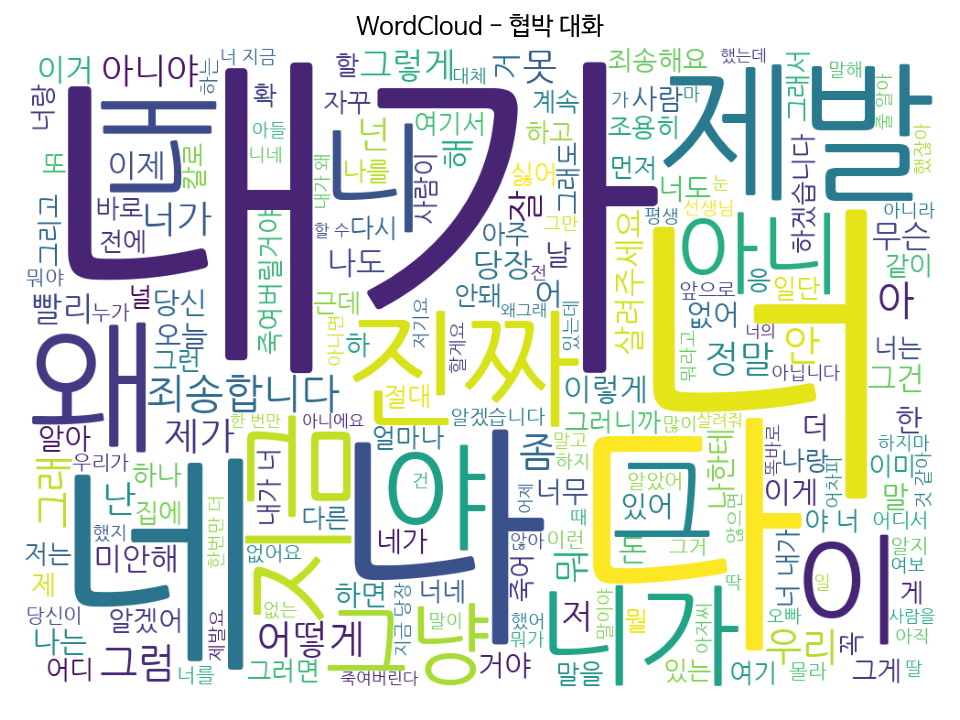

주요 키워드 (TF-IDF 기준 상위 10개):
  - 내가 (스코어: 0.0408)
  - 제발 (스코어: 0.0302)
  - 지금 (스코어: 0.0203)
  - 니가 (스코어: 0.0185)
  - 진짜 (스코어: 0.0180)
  - 죄송합니다 (스코어: 0.0168)
  - 살려주세요 (스코어: 0.0158)
  - 그냥 (스코어: 0.0149)
  - 어떻게 (스코어: 0.0141)
  - 그래 (스코어: 0.0137)
--------------------------------------------------

--- 클래스: 일반 ---


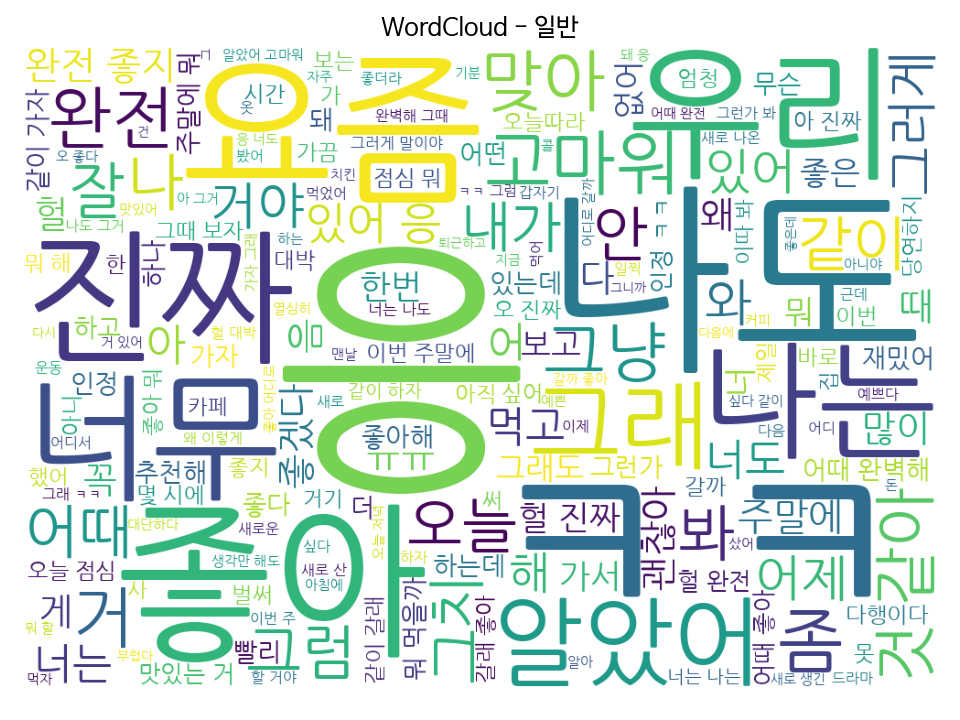

주요 키워드 (TF-IDF 기준 상위 10개):
  - ㅋㅋ (스코어: 0.0563)
  - 좋아 (스코어: 0.0418)
  - 나도 (스코어: 0.0380)
  - 요즘 (스코어: 0.0281)
  - 고마워 (스코어: 0.0269)
  - 같이 (스코어: 0.0252)
  - 어때 (스코어: 0.0250)
  - 있어 (스코어: 0.0242)
  - 완전 (스코어: 0.0236)
  - 오늘 (스코어: 0.0194)
--------------------------------------------------


In [4]:
from IPython.display import Image, display
import os

# OUT_DIR, FIG_DIR, df, tfidf_all은 이전 셀에서 정의되었습니다.

print("--- 각 클래스별 워드클라우드 시각화 및 주요 키워드 분석 ---")

for cls in df["class"].unique():
    # 1. 워드클라우드 이미지 표시
    image_path = os.path.join(FIG_DIR, f"wordcloud_{cls}.png")
    print(f"\n--- 클래스: {cls} ---")
    if os.path.exists(image_path):
        display(Image(filename=image_path))
    else:
        print(f"❌ 워드클라우드 이미지를 찾을 수 없습니다: {image_path}")

    # 2. 주요 키워드 분석 (tfidf_all DataFrame 활용)
    print(f"주요 키워드 (TF-IDF 기준 상위 10개):")
    top_keywords = tfidf_all[tfidf_all['class'] == cls].head(10)
    if not top_keywords.empty:
        for index, row in top_keywords.iterrows():
            print(f"  - {row['term']} (스코어: {row['score']:.4f})")
    else:
        print("  해당 클래스에 대한 키워드 정보가 없습니다.")
    print("--------------------------------------------------")


# Task
Create a new '공격성 대화' (aggressive conversation) class by filtering the existing DataFrame to include conversations categorized as '갈취 대화', '기타 괴롭힘 대화', '직장 내 괴롭힘 대화', and '협박 대화'. Perform TF-IDF vectorization on this new class to identify key terms and generate a WordCloud visualization. Display the WordCloud and list the top 10 keywords based on TF-IDF scores, then summarize the characteristics and key terms of this '공격성 대화' class.

## Define Aggressive Conversation Class

### Subtask:
Create a new '공격성 대화' (aggressive conversation) class by filtering the existing DataFrame (`df`) to include conversations categorized as '갈취 대화', '기타 괴롭힘 대화', '직장 내 괴롭힘 대화', and '협박 대화'.


**Reasoning**:
The first instruction is to define a list of aggressive conversation classes. This list will be used to filter the main DataFrame.



In [5]:
aggressive_classes = ['갈취 대화', '기타 괴롭힘 대화', '직장 내 괴롭힘 대화', '협박 대화']
print("Aggressive conversation classes defined:", aggressive_classes)

Aggressive conversation classes defined: ['갈취 대화', '기타 괴롭힘 대화', '직장 내 괴롭힘 대화', '협박 대화']


**Reasoning**:
The next step is to filter the main DataFrame `df` using the `aggressive_classes` list to create a new DataFrame `df_aggressive` containing only the aggressive conversation types, as per the subtask instructions.



In [6]:
df_aggressive = df[df['class'].isin(aggressive_classes)].copy()
print("--- '공격성 대화' 통합 데이터프레임 미리보기 ---")
print(df_aggressive.head())
print(f"\n'공격성 대화' 데이터프레임의 총 행 수: {len(df_aggressive)}")

--- '공격성 대화' 통합 데이터프레임 미리보기 ---
    idx      class                                       conversation
0  1480      갈취 대화  권사님 건축헌금으로 이만큼은 내주셔야죠.\n아이고 집사님 저희 가족한테 소중한 돈이...
1  1826      갈취 대화  이거 공개하면 넌 사회생활 못하겠지?\n왜 그러세요. 그러지 마세요\n글쎄 이걸 지...
2  2879      갈취 대화  야 니네집에 키위 농장한다며?\n어 응\n내가 키위 진짜 좋아하는데 좀 얻어먹어보자...
3   230      갈취 대화  친구야 저번에 돈 빌려줘서 너무 고마웠어\n아. 응.\n근데 내가 오늘도 깜빡하고 ...
4  3933  기타 괴롭힘 대화  야 넌 체육 수행평가 만점이라며?\n야 좋겠다 나도 다리 병신이었으면 얼마나 좋았을...

'공격성 대화' 데이터프레임의 총 행 수: 3846


## Perform TF-IDF and WordCloud Analysis

### Subtask:
Apply TF-IDF vectorization to the '공격성 대화' data to identify key terms, and generate a WordCloud visualization to highlight the most frequent words in this combined category.


**Reasoning**:
The first step is to initialize the TF-IDF vectorizer with the specified parameters to process the text data from the '공격성 대화' class. This prepares the data for feature extraction.



In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

# 1. Initialize a TfidfVectorizer object
vectorizer_aggressive = TfidfVectorizer(token_pattern=r"(?u)\b[\w가-힣]{2,}\b", ngram_range=(1,2), min_df=2)

# 2. Fit the vectorizer to the 'conversation' column of df_aggressive and transform the text data.
X_aggressive = vectorizer_aggressive.fit_transform(df_aggressive["conversation"])

# 3. Extract the feature names (vocabulary)
vocab_aggressive = np.array(vectorizer_aggressive.get_feature_names_out())

# 4. Calculate the mean TF-IDF scores for each term across all conversations in df_aggressive.
scores_aggressive = np.asarray(X_aggressive.mean(axis=0)).ravel()

# 10. Identify the top 30 terms based on their TF-IDF scores for the '공격성 대화' class.
top_idx_aggressive = scores_aggressive.argsort()[::-1][:30]
top_terms_df_aggressive = pd.DataFrame({"term":vocab_aggressive[top_idx_aggressive], "score":scores_aggressive[top_idx_aggressive]})
top_terms_df_aggressive["class"] = "공격성 대화"

# 11. Append this new DataFrame of top terms to the existing tfidf_all DataFrame.
tfidf_all = pd.concat([tfidf_all, top_terms_df_aggressive], ignore_index=True)

print("TF-IDF vectorization for '공격성 대화' class completed and top terms extracted.")
print("Updated tfidf_all DataFrame head:")
print(tfidf_all.tail())

TF-IDF vectorization for '공격성 대화' class completed and top terms extracted.
Updated tfidf_all DataFrame head:
    term     score   class
175   나도  0.008510  공격성 대화
176   안돼  0.008167  공격성 대화
177   여기  0.008109  공격성 대화
178  이렇게  0.008047  공격성 대화
179   있어  0.007647  공격성 대화


**Reasoning**:
Now that the TF-IDF vectorization is complete, the next step is to generate and display the WordCloud for the '공격성 대화' class using the combined text from `df_aggressive`, and then save the resulting image.



In [8]:
import matplotlib.pyplot as plt

# 5. Create a WordCloud object
text_aggressive = " ".join(df_aggressive["conversation"])
wc_aggressive = WordCloud(font_path=FONT_PATH, background_color="white", width=1000, height=700).generate(text_aggressive)

# 7. Display the generated word cloud
plt.figure(figsize=(10, 7)) # Adjust figure size for better display
plt.imshow(wc_aggressive)
plt.axis("off")

# 8. Add a title to the word cloud plot
plt.title("WordCloud - 공격성 대화")

# 9. Save the word cloud image
savefig_tight(os.path.join(FIG_DIR, "wordcloud_aggressive.png"))

print("WordCloud for '공격성 대화' generated and saved.")

📁 저장됨: /content/outputs/figures/wordcloud_aggressive.png
WordCloud for '공격성 대화' generated and saved.


## Display and Analyze Results for Aggressive Conversations

### Subtask:
Display the generated WordCloud image for '공격성 대화' and list the top 10 keywords based on their TF-IDF scores, providing an interpretation of these findings.


**Reasoning**:
The subtask requires displaying the generated WordCloud image for the '공격성 대화' class and listing its top 10 keywords based on TF-IDF scores. This code block will achieve both of these by loading and displaying the image, and then filtering and printing the relevant data from the `tfidf_all` DataFrame.



--- '공격성 대화' WordCloud 및 주요 키워드 분석 ---

--- 클래스: 공격성 대화 ---


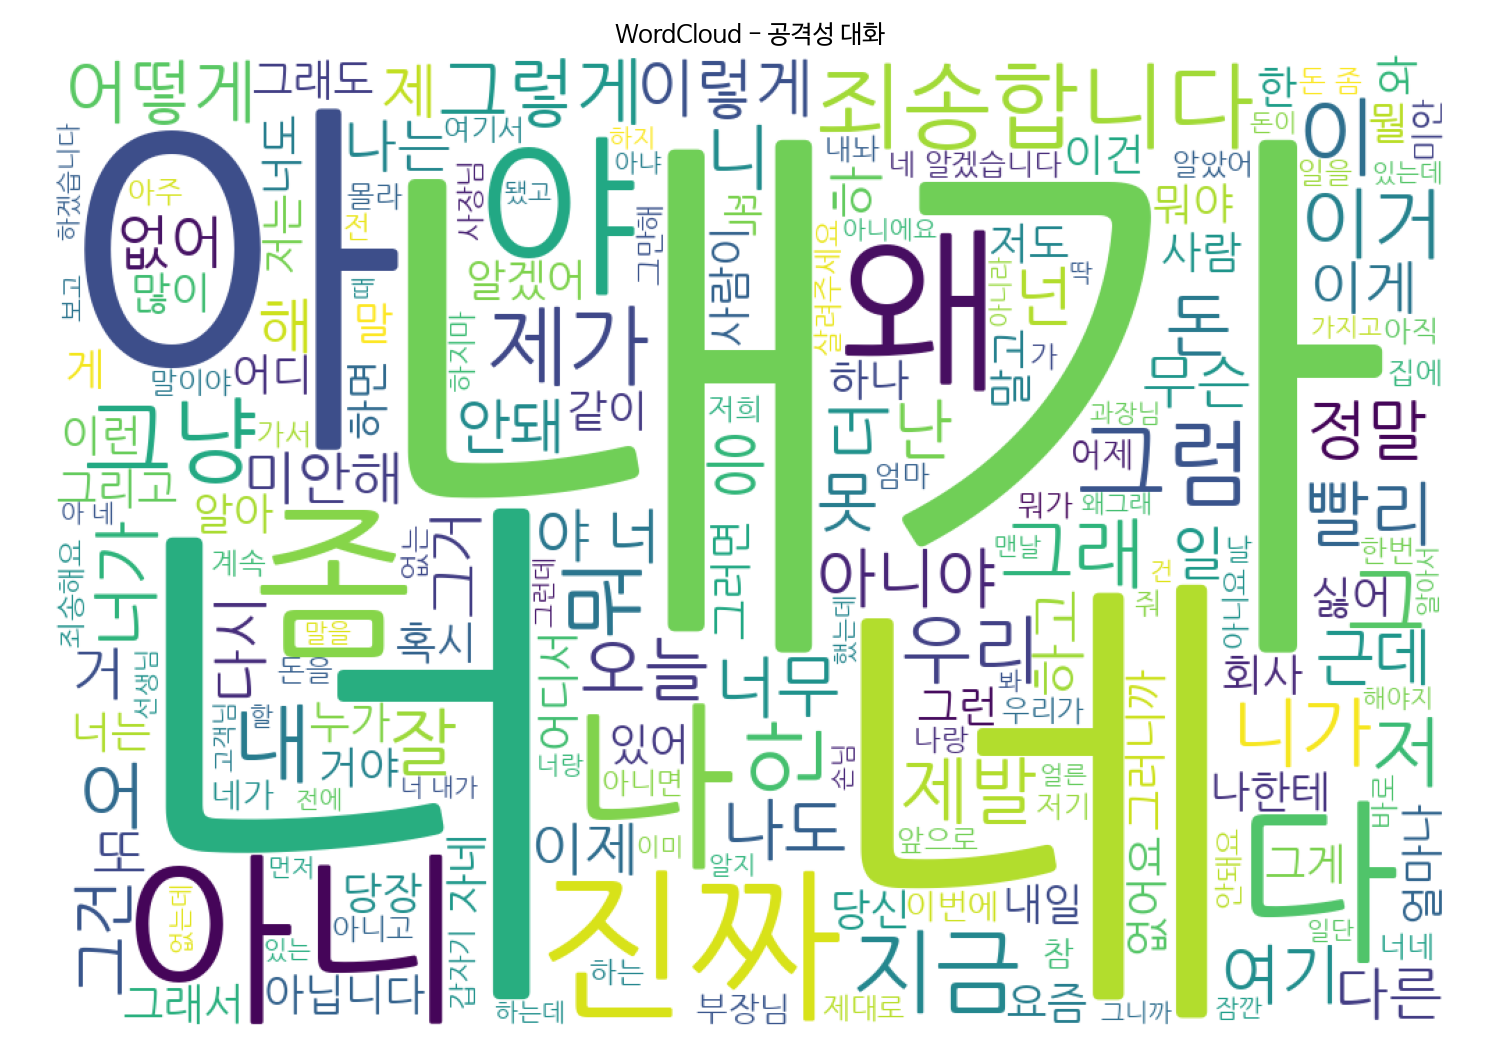

주요 키워드 (TF-IDF 기준 상위 10개):
  - 내가 (스코어: 0.0283)
  - 죄송합니다 (스코어: 0.0220)
  - 진짜 (스코어: 0.0187)
  - 아니 (스코어: 0.0185)
  - 지금 (스코어: 0.0168)
  - 그럼 (스코어: 0.0154)
  - 그래 (스코어: 0.0144)
  - 그냥 (스코어: 0.0143)
  - 제가 (스코어: 0.0133)
  - 제발 (스코어: 0.0132)
--------------------------------------------------


In [9]:
from IPython.display import Image, display
import os

print("--- '공격성 대화' WordCloud 및 주요 키워드 분석 ---")

# 1. 워드클라우드 이미지 표시
image_path_aggressive = os.path.join(FIG_DIR, "wordcloud_aggressive.png")
print(f"\n--- 클래스: 공격성 대화 ---")
if os.path.exists(image_path_aggressive):
    display(Image(filename=image_path_aggressive))
else:
    print(f"❌ 워드클라우드 이미지를 찾을 수 없습니다: {image_path_aggressive}")

# 2. 주요 키워드 분석 (tfidf_all DataFrame 활용)
print(f"주요 키워드 (TF-IDF 기준 상위 10개):")
top_keywords_aggressive = tfidf_all[tfidf_all['class'] == '공격성 대화'].head(10)
if not top_keywords_aggressive.empty:
    for index, row in top_keywords_aggressive.iterrows():
        print(f"  - {row['term']} (스코어: {row['score']:.4f})")
else:
    print("  해당 클래스에 대한 키워드 정보가 없습니다.")
print("--------------------------------------------------")

### '공격성 대화' 분석 요약

'공격성 대화' 워드클라우드와 TF-IDF 기준 상위 10개 키워드를 분석한 결과, 다음과 같은 특징을 발견할 수 있습니다:

*   **주요 키워드**: '내가', '죄송합니다', '진짜', '아니', '지금', '그럼', '그래', '그냥', '제가', '제발' 등이 상위권을 차지했습니다.

*   **화자의 감정 및 태도**: '죄송합니다', '제발'과 같은 단어는 주로 피해자 또는 약자의 입장에서 나타나는 사과나 애원의 감정을 반영합니다. 반면, '내가', '진짜', '아니', '지금', '그럼', '그래', '그냥' 등은 대화의 주도권을 쥐고 있거나 강한 불만, 요구, 지시 등을 표현하는 가해자 또는 공격자의 입장에서 사용될 수 있는 단어들로 보입니다.

*   **대화의 흐름**: '지금', '그럼', '그래', '그냥'과 같은 연결어는 대화의 흐름을 빠르게 전환하거나 특정 상황에 대한 즉각적인 반응을 요구하는 양상을 보여줍니다. 이는 공격적인 대화가 일방적이거나 즉각적인 반응을 기대하는 경향이 있음을 시사합니다.

*   **주요 테마**: 전체적으로 '공격성 대화'는 강압, 요구, 위협, 또는 이에 대한 방어적 반응(사과, 애원)의 테마를 포함하고 있습니다. 특히 '내가'라는 주체 표현과 '죄송합니다', '제발'이라는 약자 표현이 동시에 높은 빈도로 나타나는 것은 공격자와 피해자 간의 상호작용이 잦음을 명확히 보여줍니다.

### '공격성 대화' 분석 요약

'공격성 대화' 워드클라우드와 TF-IDF 기준 상위 10개 키워드를 분석한 결과, 다음과 같은 특징을 발견할 수 있습니다:

*   **주요 키워드**: '내가', '죄송합니다', '진짜', '아니', '지금', '그럼', '그래', '그냥', '제가', '제발' 등이 상위권을 차지했습니다.

*   **화자의 감정 및 태도**: '죄송합니다', '제발'과 같은 단어는 주로 피해자 또는 약자의 입장에서 나타나는 사과나 애원의 감정을 반영합니다. 반면, '내가', '진짜', '아니', '지금', '그럼', '그래', '그냥' 등은 대화의 주도권을 쥐고 있거나 강한 불만, 요구, 지시 등을 표현하는 가해자 또는 공격자의 입장에서 사용될 수 있는 단어들로 보입니다.

*   **대화의 흐름**: '지금', '그럼', '그래', '그냥'과 같은 연결어는 대화의 흐름을 빠르게 전환하거나 특정 상황에 대한 즉각적인 반응을 요구하는 양상을 보여줍니다. 이는 공격적인 대화가 일방적이거나 즉각적인 반응을 기대하는 경향이 있음을 시사합니다.

*   **주요 테마**: 전체적으로 '공격성 대화'는 강압, 요구, 위협, 또는 이에 대한 방어적 반응(사과, 애원)의 테마를 포함하고 있습니다. 특히 '내가'라는 주체 표현과 '죄송합니다', '제발'이라는 약자 표현이 동시에 높은 빈도로 나타나는 것은 공격자와 피해자 간의 상호작용이 잦음을 명확히 보여줍니다.


## Final Task

### Subtask:
Summarize the characteristics and key terms of the newly defined '공격성 대화' class based on the analysis.


## Summary:

### Q&A
The '공격성 대화' (aggressive conversation) class is characterized by a strong interplay between an aggressor and a victim. Key terms like '내가' (I), '진짜' (really), '아니' (no), '지금' (now), '그럼' (then), '그래' (okay), and '그냥' (just) suggest a dominant or demanding stance, likely from the aggressor. Conversely, terms like '죄송합니다' (I'm sorry) and '제발' (please) frequently appear, indicating a submissive or pleading position, typical of a victim. This dual presence of terms signifies conversations involving coercion, demands, threats, and defensive reactions, often with an immediate and sometimes one-sided conversational flow.

### Data Analysis Key Findings
*   A new DataFrame, `df_aggressive`, was successfully created by filtering the original data for '갈취 대화', '기타 괴롭힘 대화', '직장 내 괴롭힘 대화', and '협박 대화' categories, resulting in 3846 rows.
*   TF-IDF vectorization was applied to the `df_aggressive` conversations, and a WordCloud was generated, visually representing the most significant terms.
*   The top 10 keywords for '공격성 대화' based on their TF-IDF scores are:
    *   내가 (Score: 0.0283)
    *   죄송합니다 (Score: 0.0220)
    *   진짜 (Score: 0.0187)
    *   아니 (Score: 0.0185)
    *   지금 (Score: 0.0168)
    *   그럼 (Score: 0.0154)
    *   그래 (Score: 0.0144)
    *   그냥 (Score: 0.0143)
    *   제가 (Score: 0.0133)
    *   제발 (Score: 0.0132)
*   The co-occurrence of terms like '내가', '진짜' (aggressor's language) and '죄송합니다', '제발' (victim's language) highlights a clear interaction between two parties, often one imposing and one responding defensively, indicative of the aggressive nature of these conversations.

### Insights or Next Steps
*   The distinct vocabulary patterns observed between aggressor-like and victim-like terms suggest potential for developing more nuanced models to detect roles within aggressive conversations.
*   Further linguistic analysis, such as examining the context of these key terms or applying discourse analysis, could provide deeper insights into the power dynamics and emotional states prevalent in '공격성 대화'.
